<a href="https://colab.research.google.com/github/Shranya24/ai_ml/blob/main/houseprices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [4]:
house_price_dataset = fetch_california_housing()

In [5]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [8]:
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns= house_price_dataset.feature_names)

In [9]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
house_price_dataframe['Price'] = house_price_dataset.target

In [12]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
#missing values
house_price_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


understanding the correlation bw various features in the dataset

In [15]:
correlation = house_price_dataframe.corr()

<Axes: >

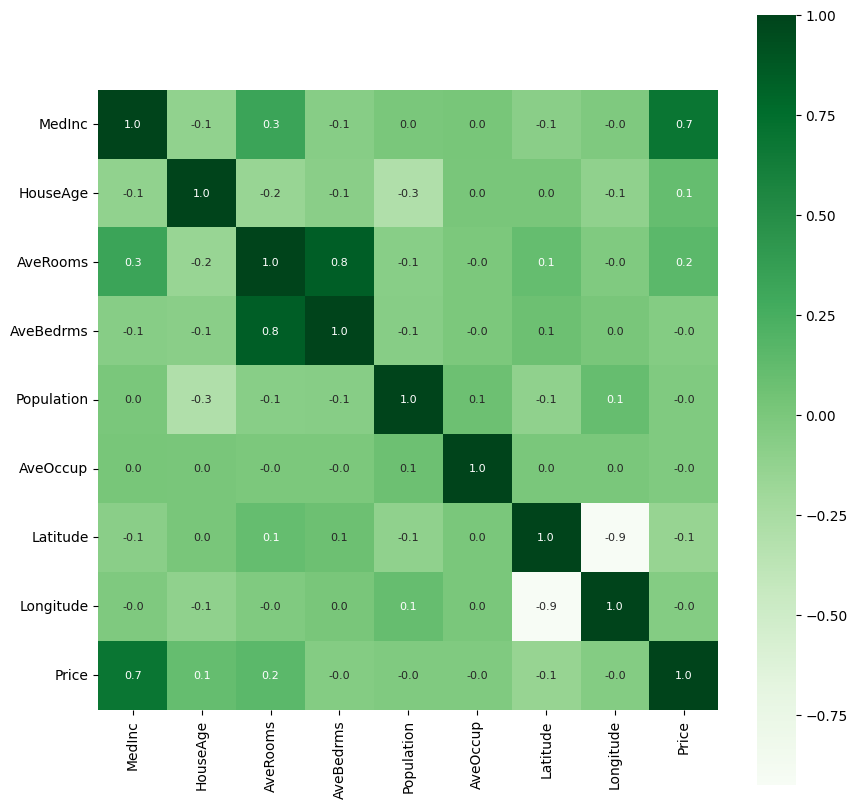

In [23]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True,square = True, fmt= '.1f', annot= True, annot_kws={'size':8}, cmap='Greens')

In [24]:
X = house_price_dataframe.drop(['Price'], axis = 1)
Y = house_price_dataframe.Price

In [25]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

Model training

In [28]:
model = XGBRegressor()

In [29]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Prediction on training data


In [30]:
#accuracy for prediction
training_data_prediction = model.predict(X_train)

In [31]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


These are the errors for regression like accuracy score is for classification


In [34]:
#R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)
#mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

In [37]:
print('R squared error:', score_1)
print('Mean absolute error:', score_2)

R squared error: 0.943650140819218
Mean absolute error: 0.1933648700612105


Visualizing the actual prices and predicted prices


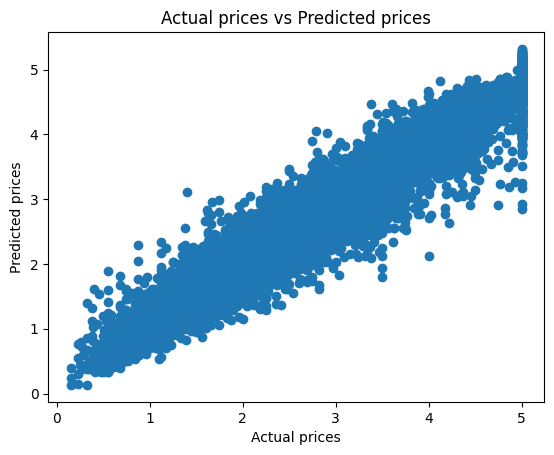

In [44]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual prices vs Predicted prices')
plt.show()

Prediction on test data

In [38]:
test_data_prediction = model.predict(X_test)
score_1 = metrics.r2_score(Y_test, test_data_prediction)
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [39]:
print('R squared error:', score_1)
print('Mean absolute error:', score_2)

R squared error: 0.8338000331788725
Mean absolute error: 0.3108631800268186
